**NAME :** Poojan Vadaliya

**TOPIC :** Disaster Relief Fund Allocation Analysis : Identifying Excessive grant Homeowners.

# Problem Statement:
Here our task is to identify which homes/homeowners or might be the contractor in the state of Louisiana got more money than they were supposed to so we can make sure the money is used properly, shared fairly, and disaster recovery programs work better in a future scenario, hence it is a **binary classification problem**.

Also looking to the extensive-data it could by doing the exploratory data analysis of the acquired data we can try to identify the numbers which could have been saved at first if the frauds were detected before the disbursement of the grant leading to extensive help to other homeowners.


**DATASET SOURCE:**

Overall, the acquired Dataset consists of 130053 rows and 36 feature columns describing the house demographics, bifurcation of accepted grant amounts along with the homes that have been identified as acquiring more funds than actually required.

Here, I was able to request the data from ProPublica DataStore which acquired the data from Louisiana Division of Administration.

**MODELS CONSIDERED FOR CLASSIFICATION TASK:**
* Logistic Regression
* Random Forest
* Support Vector Machines


### **Importing Libraries and Connecting To the Dataset**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
## Path to Dataset
DATA_PATH = '/content/gdrive/MyDrive/DATA 6300/Final Project/roadhome_for_datastore.csv'

In [3]:
#Importing all the required libraries for the project

import pandas as pd
import numpy as np
from pyspark.sql.functions import col
from pyspark.sql.functions import isnan, when, count, col
from pyspark.ml.feature import Imputer
from pyspark.ml.feature import StringIndexer
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import avg
from pyspark.sql.functions import sum
from matplotlib.ticker import FuncFormatter
from pyspark.sql.functions import sum
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from collections import Counter
from sklearn.ensemble import BaggingClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report




### **Installing Pyspark**



In [4]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=69a28bbabdf9ef358e8d2b075b4a2c6f26fc0d967bb041369c532d77a27b123b
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [5]:
pip install findspark

#### **Install Open JDK And Load the dataset.**

In [6]:
# Initialize the spark on jupyter notebook
import os
import sys

os.environ['PYSPARK_PYTHON'] = sys.executable

os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

import findspark
findspark.init()
#findspark.find()

# To create the dataframe in pyspark
from pyspark.sql import SparkSession

In [7]:
# Initializing the sparksesstion
spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

### **Loading and Examining the dataset**

In [8]:
df = spark.read.option("header", "true").csv(DATA_PATH)

In [9]:
# Count number of rows
row_count = df.count()

# Count number of columns
column_count = len(df.columns)

# Print the number of rows and columns
print("Number of rows:", row_count)
print("Number of columns:", column_count)


Number of rows: 130053
Number of columns: 36


In [ ]:
df.show(truncate=False)

In [ ]:
# As it seemed all the columns are of categorical type so would be examining the columns having numerical values and convert it into numerical type.
from pyspark.sql.functions import col

# Define a list of columns to convert
columns_to_convert = ['TOTAL_CLOSING_AMOUNT','Total CG Amount','Total ACG Amunt','Total Elevation Amount', 'Total IMM Amount', 'Current Damage Assessment', 'Current Damage Assessment - Type 1', 'Current Damage Assessment - Type 2', 'Current PSV' , 'Current Total DOB Amount (no Legal Fees removed)', 'Current Legal Fees' , 'Closing Damage Assessment', 'PSV at Closing', 'Closing Total DOB Amount', 'Difference between Current PSV and Current Damage Assessment Type 2 (col AG - col AC']

# Iterate over each column to convert
for col_name in columns_to_convert:
    # Convert the column to integer type if possible, else to float type
    df = df.withColumn(col_name, col(col_name).cast("int").alias(col_name)) \
           .withColumn(col_name, col(col_name).cast("float").alias(col_name))

# Show the DataFrame with converted columns
df.show()


In [13]:
# Checking out the list of numerical columns
from pyspark.sql.types import NumericType

# List to store numerical columns
numerical_columns = []

# Iterate over each column in the DataFrame's schema
for col_name, col_type in df.dtypes:
    # Check if the column type is numerical
    if isinstance(df.schema[col_name].dataType, NumericType):
        # Add the column to the list of numerical columns
        numerical_columns.append(col_name)

# Print the numerical columns
print("Numerical Columns: ", numerical_columns)

Numerical Columns:  ['TOTAL_CLOSING_AMOUNT', 'Total CG Amount', 'Total ACG Amunt', 'Total Elevation Amount', 'Total IMM Amount', 'Current Damage Assessment', 'Current Damage Assessment - Type 1', 'Current Damage Assessment - Type 2', 'Current PSV', 'Current Total DOB Amount (no Legal Fees removed)', 'Current Legal Fees', 'Closing Damage Assessment', 'PSV at Closing', 'Closing Total DOB Amount', 'Difference between Current PSV and Current Damage Assessment Type 2 (col AG - col AC']


In [14]:
# Checking out columns with categorical value along with its unique categories
# List to store categorical columns
categorical_columns = []

# Iterate over each column in the DataFrame
for col_name, col_type in df.dtypes:
    # Check if the column type is string or categorical
    if col_type == "string":
        # Add the column to the list of categorical columns
        categorical_columns.append(col_name)

# Display unique categories for each categorical column
for col_name in categorical_columns:
    unique_categories = df.select(col_name).distinct().rdd.flatMap(lambda x: x).collect()
    print(col_name," : " , unique_categories)
    print(len(unique_categories))


_c0  :  ['296', '467', '675', '691', '829', '1090', '1159', '1436', '1512', '1572', '2069', '2088', '2136', '2162', '2294', '2904', '3210', '3414', '3606', '3959', '4032', '4821', '4937', '5325', '6194', '6240', '6613', '6731', '7252', '7273', '7711', '7762', '8304', '8433', '9009', '9030', '9583', '9586', '9993', '10096', '10351', '10436', '11078', '11332', '11563', '11722', '11888', '12394', '12529', '12847', '13192', '13442', '13610', '13772', '13865', '14157', '14204', '14369', '14838', '14887', '14899', '15269', '15271', '15555', '15574', '15634', '16250', '16320', '16504', '16576', '16974', '17401', '17427', '17506', '17686', '17714', '18130', '18314', '18333', '18509', '18556', '18574', '18726', '18947', '18992', '19095', '19132', '19338', '20158', '20512', '20569', '20868', '21259', '21331', '21783', '21889', '21894', '22121', '22254', '22596', '22728', '23097', '23459', '23843', '23918', '25032', '25894', '25912', '25969', '26005', '26082', '26112', '26439', '27108', '27248', 

### **HANDLING THE MISSING VALUES**

In [15]:
# Finding out the column with missing values

from pyspark.sql.functions import isnan, when, count, col

df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+--------------+--------+---------+-------+------+--------------+--------------------+---------------+---------------+----------------------+----------------+-----------------------------+---------------------------+------------------------+----------------------+-----+------------+-----------+------------+-------------------------+----------------------------------+----------------------------------+------------------+-----------+------------------------------------------------+------------------+-------------------------+--------------+---------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------+--------------------------------------+-----------------------------------------------------------+------------------------+------------------------------------------------------------------------------------+-----------------+
|_c0|St

After checking the number of null values in the above dataset we were able to find out that the 83157 samples of data for NOLA was not present hence , also looking at the relevancy factors of the following columns which has data from NOLA are :
* NOLA Planning District Number
* NOLA Planning District Name
* NOLA Neighborhood Number
* NOLA Neighborhood Name

we can drop the above columns as it not being a significant factor by checking a correlation with the target variable.

In [16]:
# List of columns to drop
columns_to_drop = ['_c0','NOLA Planning District Number', 'NOLA Planning District Name', 'NOLA Neighborhood Number', 'NOLA Neighborhood Name']

# Drop the specified columns
df = df.drop(*columns_to_drop)

As we can see that the column Closing Total DOB Amount has 6 missing values so here the null values have been imputed with the column with mean of the value.

In [ ]:
# Checking the null valued rows in the following column
column_name = 'Closing Total DOB Amount'

# Filter rows with null values in the specified column
rows_with_null = df.filter(col(column_name).isNull())

# Show the rows with null values
rows_with_null.show(truncate=False)


In [ ]:
# Imputing the column with missing values
from pyspark.ml.feature import Imputer

column_to_impute = 'Closing Total DOB Amount'

# Initialize Imputer
imputer = Imputer(inputCols=[column_to_impute], outputCols=[f"{column_to_impute}_imputed"])

# Fit and transform the DataFrame to impute missing values with the mean
df = imputer.setStrategy("mean").fit(df).transform(df)

# Drop the column with empty value
df = df.drop('Closing Total DOB Amount')

# Renaming the imputed column witht he original name
df = df.withColumnRenamed('Closing Total DOB Amount_imputed', 'Closing Total DOB Amount')

# Show the DataFrame with imputed values
df.show()


In [19]:
# Get column names with null values
columns_with_null = [col_name for col_name in df.columns if df.filter(col(col_name).isNull()).count() > 0]

# Print column names with null values
print("Column names with null values:", columns_with_null)


Column names with null values: []


Hence now we have a dataset with all the columns with missing values handled.

### **EXPLORATORY DATA ANALYSIS**

#### **Cities and structures granted the most.**

##### **Which cities got the most funds?**

<ipython-input-21-1679708088b2>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='TotalClosingGrant', y='GIS City', data=top_10_cities_pd, palette='viridis')


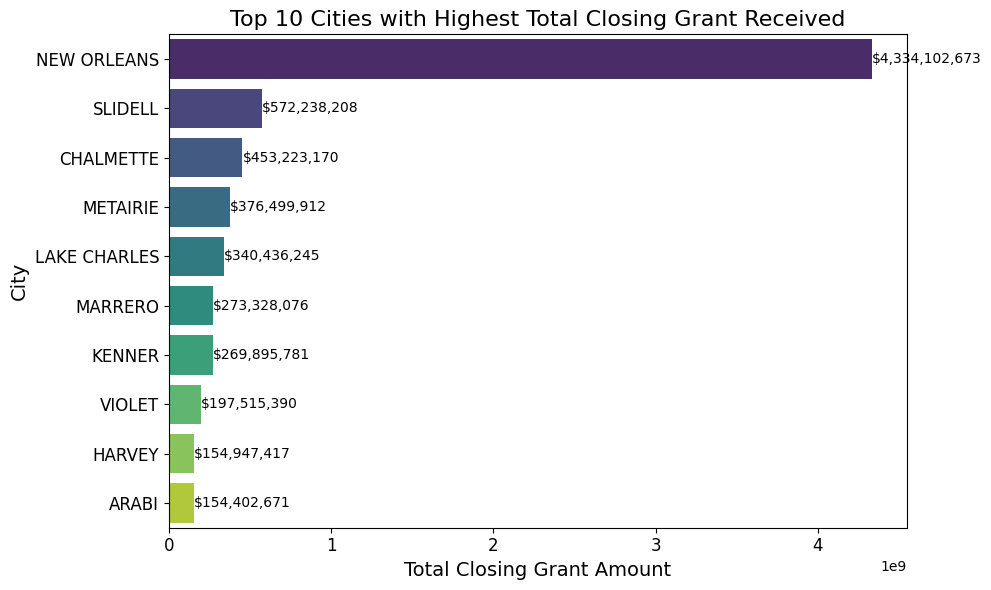

<Figure size 640x480 with 0 Axes>

In [21]:
# Group by city and sum up the total closing grant amount
city_grant_df = df.groupBy('GIS City') \
                  .agg({'TOTAL_CLOSING_AMOUNT': 'sum'}) \
                  .withColumnRenamed('sum(TOTAL_CLOSING_AMOUNT)', 'TotalClosingGrant') \
                  .orderBy(col('TotalClosingGrant').desc())

# Show the top 10 cities with the highest total closing grant received
top_10_cities = city_grant_df.limit(10)

# top_10_cities.show()

# Convert the PySpark DataFrame to a Pandas DataFrame
top_10_cities_pd = top_10_cities.toPandas()

# Plotting
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='TotalClosingGrant', y='GIS City', data=top_10_cities_pd, palette='viridis')
plt.title('Top 10 Cities with Highest Total Closing Grant Received', fontsize=16)
plt.xlabel('Total Closing Grant Amount', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotate each bar with the corresponding money amount
for index, row in top_10_cities_pd.iterrows():
    barplot.text(row['TotalClosingGrant'], index, f"${row['TotalClosingGrant']:,.0f}", ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

Insight : It can be assumed that New Orleans would be the city which was impacted the most as it was granted around 4.3 Billion USD.

##### **Data of houses gathered according to structure type**

<ipython-input-22-215311ca34de>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=structure_type_count, x='Structure Type', y='count', palette='Set2')


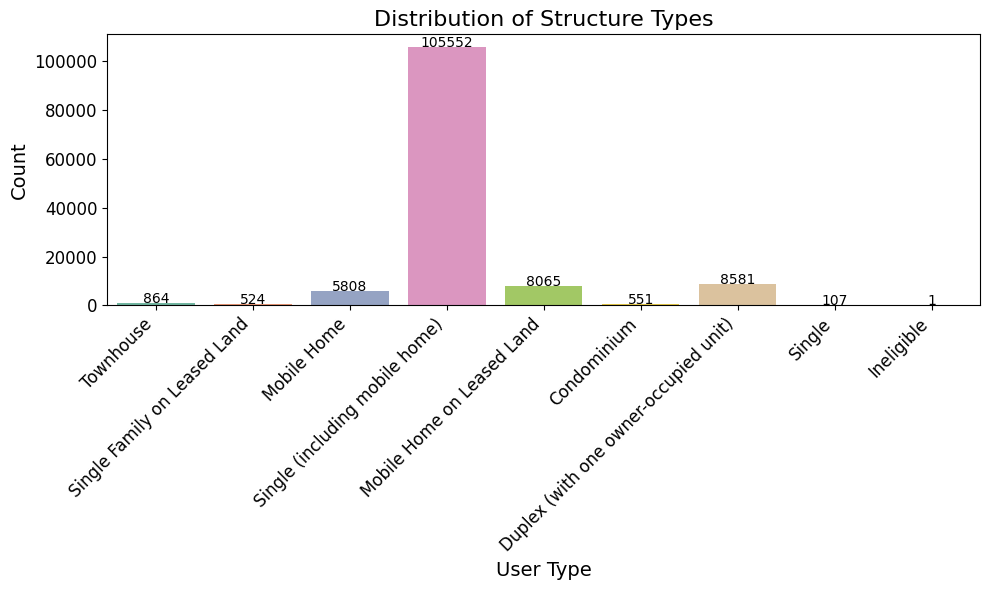

In [22]:
# Aggregate the counts of user types
structure_type_count = df.groupBy('Structure Type').count().toPandas()

# Plot the distribution of user types using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
ax = sns.barplot(data=structure_type_count, x='Structure Type', y='count', palette='Set2')

# Beautify the x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate labels by 45 degrees, align right, and adjust font size
plt.yticks(fontsize=12)  # Adjust font size for y-axis labels

plt.title('Distribution of Structure Types', fontsize=16)
plt.xlabel('User Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add annotations to show the value of each category
for index, row in structure_type_count.iterrows():
    ax.text(index, row['count'], row['count'], color='black', ha="center", fontsize=10)

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

#### **Restoration options considered for the grants**

##### **What options were selected among the grant owners.**

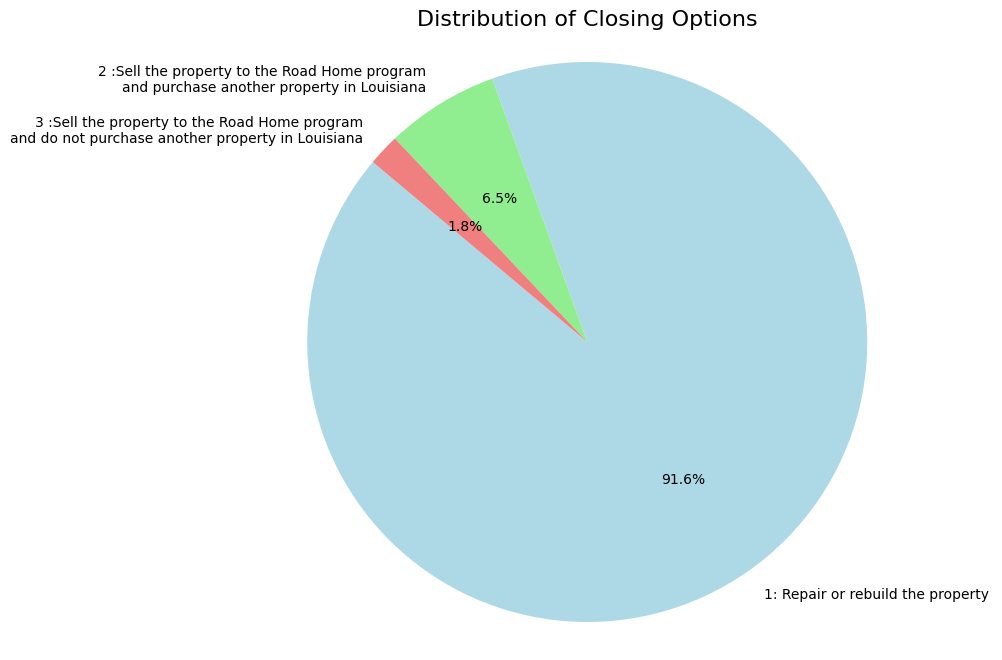

In [23]:
import matplotlib.pyplot as plt

# Get the count of each closing option
closing_options_count = df.groupBy('Closing Option').count().orderBy('count', ascending=False).toPandas()

# Define colors for the pie chart
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue']

# Explode the slice to emphasize a particular option (optional)
explode = (0.1, 0, 0, 0)

# Custom labels for the pie chart
custom_labels = [
    '1: Repair or rebuild the property ',
    '2 :Sell the property to the Road Home program\nand purchase another property in Louisiana',
    '3 :Sell the property to the Road Home program\nand do not purchase another property in Louisiana'
]

# Plotting
plt.figure(figsize=(10, 8))
plt.pie(closing_options_count['count'], labels=custom_labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Closing Options', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add legend
# plt.legend(loc='lower right', fontsize='large')

plt.show()


**Insight** : It seemed that majority of the people were prefereing to repair and rebuild the house rather then relocating themselves to a new location.

##### **Consideration of houses under Damage type 1 and Damage type 2**

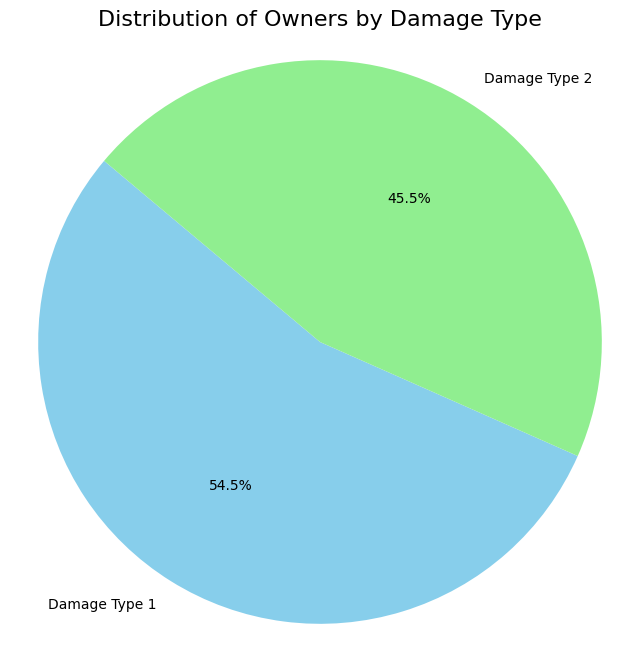

In [24]:
import matplotlib.pyplot as plt

# Group by Damage Type 1 or 2 and count the number of records
damage_type_counts = df.groupBy('Damage Type 1 or 2').count().orderBy('Damage Type 1 or 2').toPandas()

# Define labels for the pie chart
labels = ['Damage Type 1', 'Damage Type 2']

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(damage_type_counts['count'], labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Distribution of Owners by Damage Type', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Insight : 54.5% of houses were considered have less than 50% of damage whereas 45.5% of houses were more than 50% damanged due which lead to a complete rebuilding of the house rather than restoring it.

##### **How were the properties granted and how did the total grant differ from the Compensating grant?**

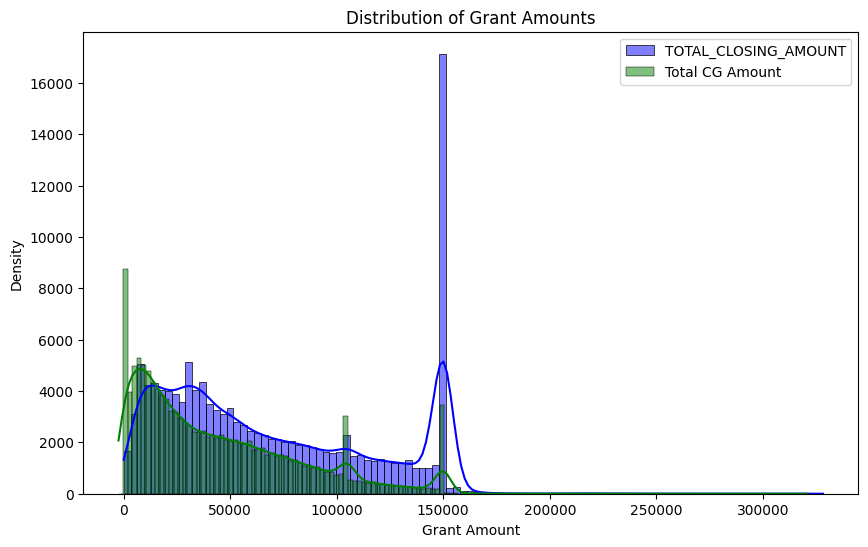

In [25]:
# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = df.select('TOTAL_CLOSING_AMOUNT', 'Total CG Amount','Total ACG Amunt','Total Elevation Amount').toPandas()

# Plot density plots for grant amounts using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=pandas_df, x='TOTAL_CLOSING_AMOUNT', kde=True, color='blue', label='TOTAL_CLOSING_AMOUNT')
sns.histplot(data=pandas_df, x='Total CG Amount', kde=True, color='green', label='Total CG Amount')
plt.xlabel('Grant Amount')
plt.ylabel('Density')
plt.title('Distribution of Grant Amounts')
plt.legend()
plt.show()


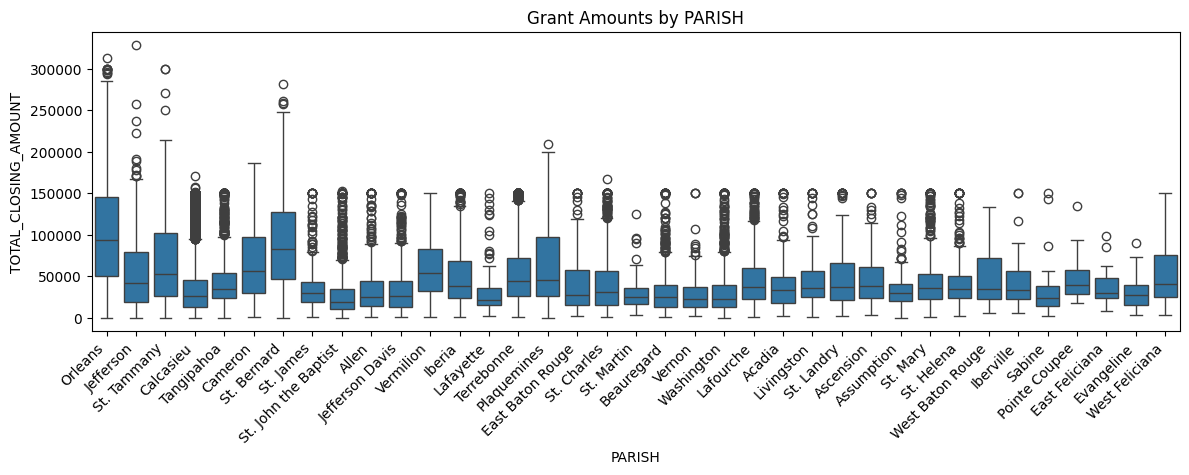

In [27]:
# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = df.select('PARISH', 'Structure Type', 'TOTAL_CLOSING_AMOUNT').toPandas()

# Plot boxplots for grant amounts across different categories
plt.figure(figsize=(12, 8))

# Boxplot by PARISH
plt.subplot(2, 1, 1)
sns.boxplot(x='PARISH', y='TOTAL_CLOSING_AMOUNT', data=pandas_df)
plt.title('Grant Amounts by PARISH')
plt.xticks(rotation=45, ha='right')  # Adjust rotation and alignment of x-axis labels

plt.tight_layout()
plt.show()


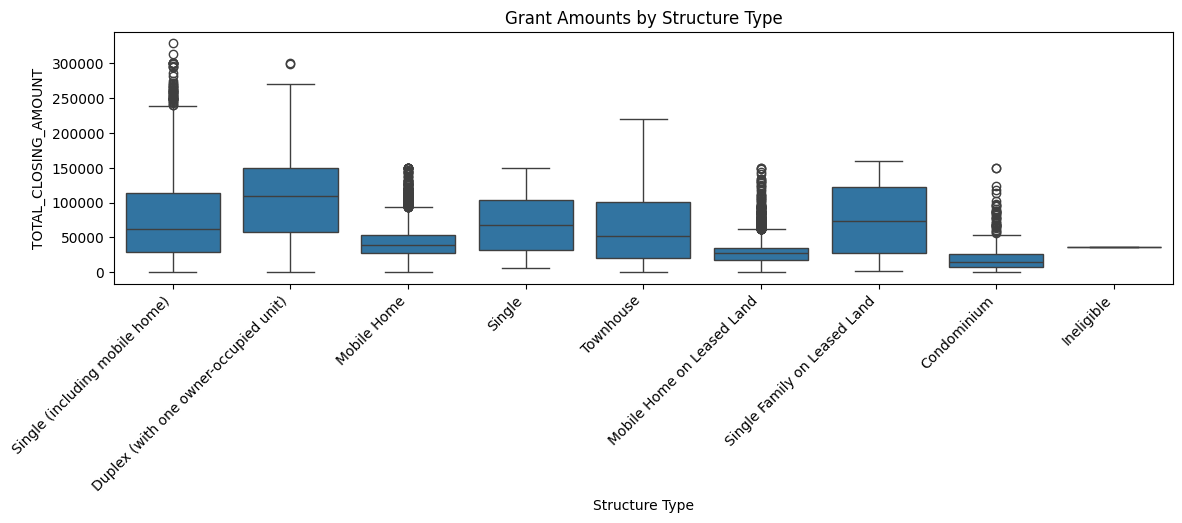

In [28]:
# Boxplot by Structure Type
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 2)
sns.boxplot(x='Structure Type', y='TOTAL_CLOSING_AMOUNT', data=pandas_df)
plt.title('Grant Amounts by Structure Type')
plt.xticks(rotation=45, ha='right')  # Adjust rotation and alignment of x-axis labels

plt.tight_layout()
plt.show()

Insights : Here we can see there are many homes which were granted more than the usual range of which displayed the variations of property valuations which might be different based on location or other factors.

#### **Overfunded Grants**

##### **Overfunded grants Citywise**

In [29]:
from pyspark.sql.functions import sum

# Filter the DataFrame to include only the rows where more grant was given
overfunded_grants_df = df.filter(col('ARS File (Yes/No)') == 'Y')

# Group the data by city and sum the total closing amount for overfunded records in each city
citywise_total_closing = overfunded_grants_df.groupBy('GIS City') \
                                            .agg(sum('TOTAL_CLOSING_AMOUNT').alias('Total Closing Amount'))

# Order the results by the total closing amount in descending order
citywise_total_closing = citywise_total_closing.orderBy('Total Closing Amount', ascending=False)

# Select the top 10 cities with the highest total closing amounts
top_10_cities = citywise_total_closing.limit(10)

# Show the top 10 cities with the highest total closing amounts
top_10_cities.show()

# Set the style for the plot
sns.set_style("whitegrid")

top_10_cities_pd = top_10_cities.toPandas()

+------------+--------------------+
|    GIS City|Total Closing Amount|
+------------+--------------------+
| NEW ORLEANS|        2.38063469E8|
|     SLIDELL|         5.4289083E7|
|LAKE CHARLES|         3.1911003E7|
|   CHALMETTE|         2.6569675E7|
|    METAIRIE|         2.6368684E7|
|      KENNER|         1.7623903E7|
|     MARRERO|          1.560394E7|
|      VIOLET|         1.2782449E7|
|      HARVEY|         1.0347225E7|
|       ARABI|           8675680.0|
+------------+--------------------+



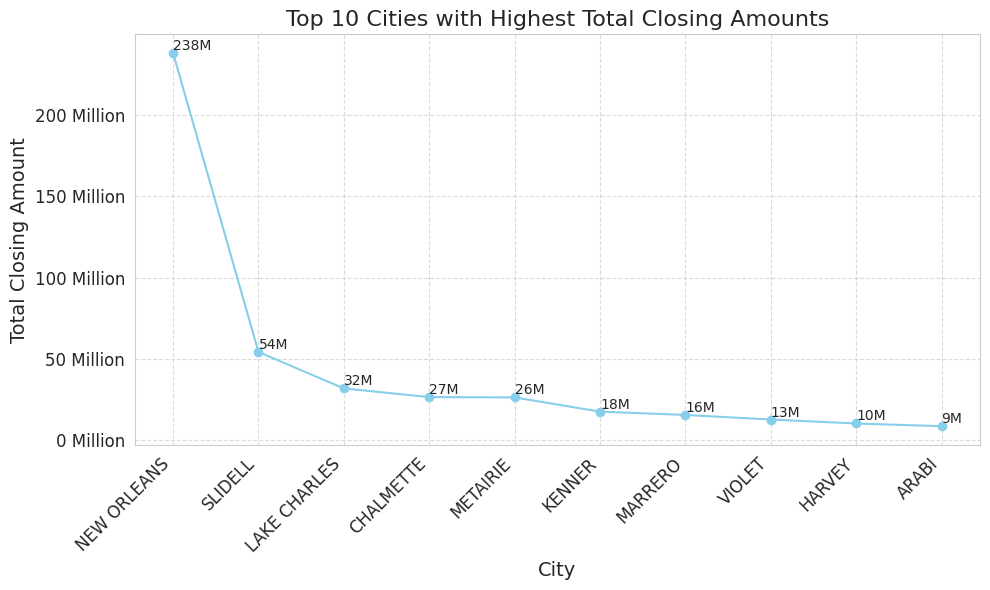

In [30]:
from matplotlib.ticker import FuncFormatter
# Define a function to format the y-axis labels
def millions_formatter(x, pos):
    return f'{x/1e6:.0f} Million'

# Convert the DataFrame to Pandas for easier plotting
top_10_cities_pd = top_10_cities.toPandas()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(top_10_cities_pd['GIS City'], top_10_cities_pd['Total Closing Amount'], marker='o', color='skyblue', linestyle='-')
plt.title('Top 10 Cities with Highest Total Closing Amounts', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Total Closing Amount', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Set the y-axis formatter to the millions_formatter function
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Annotate each point with its value in millions
for i, txt in enumerate(top_10_cities_pd['Total Closing Amount']):
    plt.text(top_10_cities_pd['GIS City'][i], top_10_cities_pd['Total Closing Amount'][i], f'{txt/1e6:.0f}M', fontsize=10, ha='left', va='bottom')

plt.tight_layout()
plt.show()

**Insight :** Almost 542 Million USD were granted more than required which could have been saved for other purposes.

##### **Overfunded grants Structurewise**

<ipython-input-33-a873b72db619>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='count', y='Structure Type', data=structure_type_count_pd, palette='Set2', alpha=0.9)


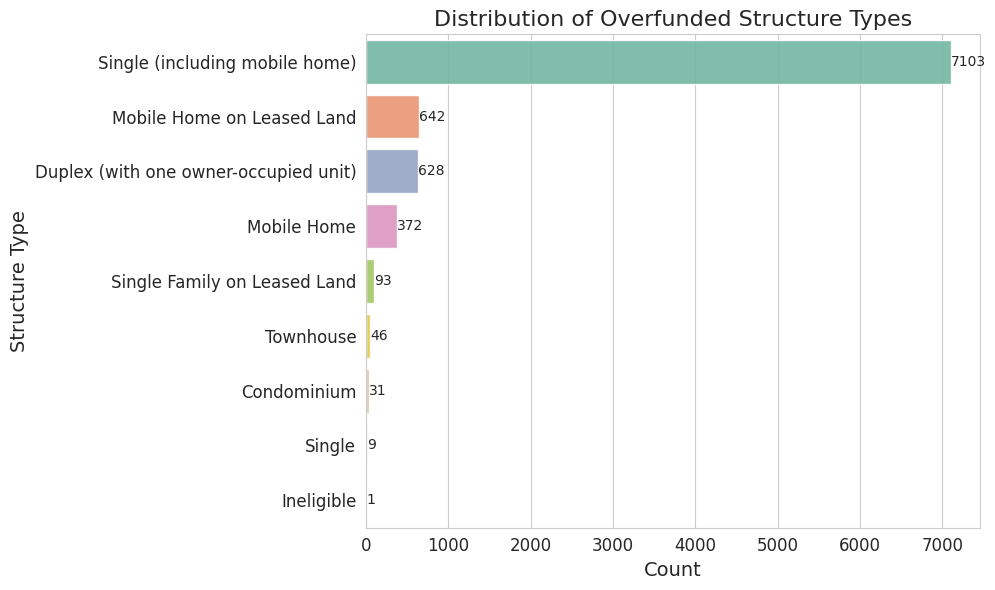

In [33]:
# Filter the DataFrame to include only the rows where more grant was given
overfunded_df = df.filter(col('ARS File (Yes/No)') == 'Y')

# Group by Structure Type and count the occurrences
structure_type_count = overfunded_df.groupBy('Structure Type').count().orderBy('count', ascending=False)

# Show the count of structure types identified to receive more grant than required
# structure_type_count.show()

structure_type_count_pd = structure_type_count.toPandas()

# Set the style for the plot
sns.set_style("whitegrid")

# Plotting
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='count', y='Structure Type', data=structure_type_count_pd, palette='Set2', alpha=0.9)
plt.title('Distribution of Overfunded Structure Types', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Structure Type', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotate each bar with its count value
for index, row in structure_type_count_pd.iterrows():
    barplot.text(row['count'], index, f"{row['count']}", ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()


**Insight:** From the data we have it is obvious that Single homes would be having the highest count of the of fraudulent classified grants.

### **Preparing data for Modelling**

#### **Encoding the categorical feature columns**

Listing all the categorical values to decide which to keep and which to encode:

 * **'Structure Type'** : Non-Ordinal
 * **'GIS City'**: Non-Ordinal - Frequancy encoding,
 * **'GIS State'** : Non-Ordinal - One hot encoding,
 * **'GIS Zip'** : NOT NEEDED,
 * **'PARISH'** : NOT NEEDED,
 * **'Closing Option'** : Non-Ordinal,
 * **'NOLA Planning District Number'**: NOT NEEDED,
 * **'NOLA Planning District Name'**: NOT NEEDED,
 * **'NOLA Neighborhood Number'** : NOT NEEDED,
 * **'NOLA Neighborhood Name'** : NOT NEEDED,
 * **'STFID'**: NOT NEEDED,
 * **'Census Block'** : NOT NEEDED,
 * **'Block Group'** : NOT NEEDED,
 * **'Census Track'** : NOT NEEDED,
 * **'Damage Type 1 or 2'**: Binary Conversion ,
 * **'Closed file - PSV Option 1 With No ACG -excluding Sold Home, Inelig, Deceased and files closed with RHEI & IMM only -23,912'** : Binary Conversion,
 * **'Closed File - Option 2/3, Sold Home, Ineligible, Deceased, and Closed with RHEI and IMM Only'** : Binary Conversion,
 * **'Closed with Approved Unmet Needs (Y/N)'** : Binary Conversion,
 * **'Applicant With Current Insurance (Private and/or Flood) Y/N'** : Binary Conversion,
 * **'ARS File (Yes/No)'** : Binary Conversion - Target Column
   * 1 : Yes : The grant was fraudulent.
   * 0 : No : The grant was valid.  

In [37]:
#Dropping unnecessary columns
categorical_columns_to_drop = ['GIS Zip', 'PARISH','STFID','Census Block','Block Group','Census Track','Closed file - PSV Option 1 With No ACG -excluding Sold Home, Inelig, Deceased and files closed with RHEI & IMM only -23,912','Closed File - Option 2/3, Sold Home, Ineligible, Deceased, and Closed with RHEI and IMM Only']

df_dropped = df.drop(*categorical_columns_to_drop)

In [38]:
# Selecting columns with one-hot encoding
categorical_columns_df_dropped = []

# Iterate over each column in the DataFrame
for col_name, col_type in df_dropped.dtypes:
    # Check if the column type is string or categorical
    if col_type == "string":
        # Add the column to the list of categorical columns
        categorical_columns_df_dropped.append(col_name)

# columns_for_one_hot_encoding = ['']
categorical_columns_df_dropped

['Structure Type',
 'GIS City',
 'GIS State',
 'Closing Option',
 'Damage Type 1 or 2',
 'Closed with Approved Unmet Needs (Y/N)',
 'Applicant With Current Insurance (Private and/or Flood) Y/N',
 'ARS File (Yes/No)']

In [39]:
# As there are low number of categories in the following categories so one-hot encoding seems to be a viable option here.
one_hot_encoding_columns = ['Structure Type','Closing Option','GIS State']
binary_encoding_columns = ['ARS File (Yes/No)','Damage Type 1 or 2']
frequancy_encoding_columns = ['GIS City']


In [40]:
# Convert PySpark DataFrame to Pandas DataFrame
df_pandas = df_dropped.toPandas()

In [41]:
# Perform one-hot encoding using Pandas' get_dummies() function
pandas_encoded_df = pd.get_dummies(df_pandas, columns = one_hot_encoding_columns)

In [42]:
# Perform binary encoding using Pandas' get_dummies() function
pandas_encoded_df = pd.get_dummies(pandas_encoded_df, columns = binary_encoding_columns, drop_first=True)
pandas_encoded_df.head(20)

GIS City  TOTAL_CLOSING_AMOUNT  Total CG Amount  Total ACG Amunt  \
0   NEW ORLEANS               70094.0          70094.0              0.0   
1   NEW ORLEANS               50254.0          50254.0              0.0   
2        HARVEY               60090.0          22590.0              0.0   
3   NEW ORLEANS               46500.0           9000.0              0.0   
4   NEW ORLEANS              150000.0          97079.0          22920.0   
5      METAIRIE              148856.0         118856.0              0.0   
6   NEW ORLEANS               11392.0          11392.0              0.0   
7        HARVEY                6358.0           6358.0              0.0   
8   NEW ORLEANS               65536.0          65536.0              0.0   
9   NEW ORLEANS               62560.0          55060.0              0.0   
10     METAIRIE               41715.0          34215.0              0.0   
11     AVONDALE               38906.0          21984.0           9421.0   
12  NEW ORLEANS              128697.0         121197.0              0.0   
13  NEW ORLEANS              150000.0         150000.0              0.0   
14  NEW ORLEANS              150000.0         150000.0              0.0   
15  NEW ORLEANS               36653.0          29153.0              0.0   
16       KENNER               15405.0           7905.0              0.0   
17     METAIRIE               19087.0          19087.0              0.0   
18  NEW ORLEANS              150000.0          53771.0          66228.0   
19  NEW ORLEANS               30408.0          30408.0              0.0   

    Total Elevation Amount  Total IMM Amount  Current Damage Assessment  \
0                      0.0               0.0                   153738.0   
1                      0.0               0.0                   163850.0   
2                  30000.0            7500.0                    44807.0   
3                  30000.0            7500.0                   171325.0   
4                  30000.0               0.0                   400750.0   
5                  30000.0               0.0                   196050.0   
6                      0.0               0.0                    66370.0   
7                      0.0               0.0                    27263.0   
8                      0.0               0.0                    94533.0   
9                      0.0            7500.0                   301850.0   
10                     0.0            7500.0                    60369.0   
11                     0.0            7500.0                    31406.0   
12                     0.0            7500.0                   281805.0   
13                     0.0               0.0                   460550.0   
14                     0.0               0.0                   128682.0   
15                     0.0            7500.0                   168871.0   
16                     0.0            7500.0                    17545.0   
17                     0.0               0.0                    36751.0   
18                 30000.0               0.0                   281380.0   
19                     0.0               0.0                    51723.0   

    Current Damage Assessment - Type 1  Current Damage Assessment - Type 2  \
0                             438141.0                            153738.0   
1                             163850.0                            231371.0   
2                             345055.0                             44807.0   
3                             171325.0                            241920.0   
4                             400750.0                            507507.0   
5                             196050.0                            114419.0   
6                             184550.0                             66370.0   
7                             302889.0                             27263.0   
8                             704350.0                             94533.0   
9                             301850.0                            189206.0 

In [43]:
# Finding out the unique categories in City column
city_column = pandas_encoded_df['GIS City'].unique()

# Calculate the frequency of each category
city_counts = pandas_encoded_df['GIS City'].value_counts()

# Replace each category name with its frequency
pandas_encoded_df['GIS City'] = pandas_encoded_df['GIS City'].map(city_counts)


In [44]:
# Converting the numerical columns into a binary category.
numerical_columns_to_convert = ['Total Elevation Amount','Total IMM Amount']

for column in numerical_columns_to_convert:
  pandas_encoded_df[column] = pandas_encoded_df[column].apply(lambda x: 1 if x != 0 else 0)


In [45]:
# As it has already been noted into Current Damage Assessment column hence looking over it we can drop the following columns
numerical_columns_to_drop = ['Current Damage Assessment - Type 1','Current Damage Assessment - Type 2']
pandas_encoded_df = pandas_encoded_df.drop(columns=numerical_columns_to_drop)
pandas_encoded_df.head()

GIS City  TOTAL_CLOSING_AMOUNT  Total CG Amount  Total ACG Amunt  \
0     46992               70094.0          70094.0              0.0   
1     46992               50254.0          50254.0              0.0   
2      3261               60090.0          22590.0              0.0   
3     46992               46500.0           9000.0              0.0   
4     46992              150000.0          97079.0          22920.0   

   Total Elevation Amount  Total IMM Amount  Current Damage Assessment  \
0                       0                 0                   153738.0   
1                       0                 0                   163850.0   
2                       1                 1                    44807.0   
3                       1                 1                   171325.0   
4                       1                 0                   400750.0   

   Current PSV  Current Total DOB Amount (no Legal Fees removed)  \
0     216000.0                                           83736.0   
1      90000.0                                           18193.0   
2     130000.0                                           22217.0   
3     100000.0                                           91000.0   
4     190000.0                                           92920.0   

   Current Legal Fees  ...  Structure Type_Townhouse  Closing Option_1.0  \
0              2448.0  ...                     False                True   
1                 0.0  ...                     False                True   
2                 0.0  ...                     False                True   
3                 0.0  ...                     False                True   
4                 0.0  ...                     False                True   

  Closing Option_2.0 Closing Option_3.0  GIS State_LA  GIS State_ME  \
0              False              False          True         False   
1              False              False          True         False   
2              False              False          True         False   
3              False              False          True         False   
4              False              False          True         False   

   GIS State_S*  GIS State_TN  ARS File (Yes/No)_Y  Damage Type 1 or 2_2.0  
0         False         False                False                    True  
1         False         False                False                   False  
2         False         False                False                    True  
3         False         False                False                   False  
4         False         False                False                   False  

[5 rows x 34 columns]

In [46]:
# Display the one-hot encoded Pandas DataFrame
pd.set_option('display.max_columns', None)  # Show all columns
pandas_encoded_df.rename(columns={'ARS File (Yes/No)_Y': 'ARS File (Yes/No)'}, inplace=True)
pandas_encoded_df

GIS City  TOTAL_CLOSING_AMOUNT  Total CG Amount  Total ACG Amunt  \
0          46992               70094.0          70094.0              0.0   
1          46992               50254.0          50254.0              0.0   
2           3261               60090.0          22590.0              0.0   
3          46992               46500.0           9000.0              0.0   
4          46992              150000.0          97079.0          22920.0   
...          ...                   ...              ...              ...   
130048     46992               84232.0          84232.0              0.0   
130049       200               13356.0           5856.0              0.0   
130050       200               43743.0          12488.0          31255.0   
130051       200               18596.0           7767.0           3328.0   
130052       200               30524.0          16117.0           6907.0   

        Total Elevation Amount  Total IMM Amount  Current Damage Assessment  \
0                            0                 0                   153738.0   
1                            0                 0                   163850.0   
2                            1                 1                    44807.0   
3                            1                 1                   171325.0   
4                            1                 0                   400750.0   
...                        ...               ...                        ...   
130048                       0                 0                        0.0   
130049                       0                 1                    12616.0   
130050                       0                 0                    45850.0   
130051                       0                 1                    11096.0   
130052                       0                 1                    23024.0   

        Current PSV  Current Total DOB Amount (no Legal Fees removed)  \
0          216000.0                                           83736.0   
1           90000.0                                           18193.0   
2          130000.0                                           22217.0   
3          100000.0                                           91000.0   
4          190000.0                                           92920.0   
...             ...                                               ...   
130048     600000.0                                          250000.0   
130049      77000.0                                            6759.0   
130050      19946.0                                            2106.0   
130051      77000.0                                               0.0   
130052      75000.0                                               0.0   

        Current Legal Fees  Closing Damage Assessment  PSV at Closing  \
0                   2448.0                   153738.0        216000.0   
1                      0.0                   163850.0         90000.0   
2                      0.0                    44807.0        130000.0   
3                      0.0                   171325.0        109252.0   
4                      0.0                   400750.0        190000.0   
...                    ...                        ...             ...   
130048                 0.0                        0.0        600000.0   
130049                 0.0                    11984.0         77000.0   
130050                 0.0                    45850.0         19946.0   
130051                 0.0                    11096.0         77000.0   
130052                 0.0                    23024.0         75000.0   

       Closed with Approved Unmet Needs (Y/N)  \
0                                           N   
1                                           N   
2                                           Y   
3                                           Y   
4                                           N   
...                                       ...   
130048                                      N   


In [47]:
# Binary encoding the columns with Yes and No values
columns_to_encode = ['Closed with Approved Unmet Needs (Y/N)','Applicant With Current Insurance (Private and/or Flood) Y/N']
# Define a mapping dictionary
mapping = {'N': 0, 'Y': 1}

# Apply the mapping function to the specified column
for column in columns_to_encode:
  pandas_encoded_df[column] = pandas_encoded_df[column].map(mapping)

#### **Handling the heavily imbalanced class**

In [48]:
# Group by the target column and count the number of rows for each category
row_counts_by_category = df.groupBy("ARS File (Yes/No)").count()

# Show the result
row_counts_by_category.show()


+-----------------+------+
|ARS File (Yes/No)| count|
+-----------------+------+
|                Y|  8925|
|                N|121128|
+-----------------+------+



Here we can see that there is a clear class imbalance of the Yes class which comprises of just below 9000 data samples whereas the No class has 121128 samples.

In [49]:
# Preparing the data for Machine Learning.
X = pandas_encoded_df.drop(columns=['ARS File (Yes/No)'])
y = pandas_encoded_df['ARS File (Yes/No)']

In [50]:
from sklearn.preprocessing import RobustScaler

# Assuming your dataset is stored in a DataFrame called df
# Create a RobustScaler object
scaler = RobustScaler()

# Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(pandas_encoded_df)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=pandas_encoded_df.columns)

X = scaled_df.drop(columns=['ARS File (Yes/No)'])
y = scaled_df['ARS File (Yes/No)']


As there is a large class imbalance hence it has been handled by applying Undersampling and Oversampling methods which lead to the following number of sample before and after the class balancing :

In [51]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from collections import Counter

# Step 1: Check the class distribution
class_distribution = Counter(y)
print("Class distribution before resampling:", class_distribution)

# Step 2: Define the resampling strategies
undersampler = RandomUnderSampler(sampling_strategy=0.5, random_state=42)  # Undersample majority class
oversampler = RandomOverSampler(sampling_strategy='auto')  # Oversample minority class

# Step 3: Define the pipeline to perform both undersampling and oversampling
pipeline = Pipeline([
    ('undersample', undersampler),
    ('oversample', oversampler)
])

# Step 4: Fit and apply the pipeline on the dataset
X_resampled, y_resampled = pipeline.fit_resample(X, y)

# Step 5: Check the class distribution after resampling
resampled_class_distribution = Counter(y_resampled)
print("Class distribution after resampling:", resampled_class_distribution)


Class distribution before resampling: Counter({0.0: 121128, 1.0: 8925})
Class distribution after resampling: Counter({0.0: 17850, 1.0: 17850})


### **MODELLING**

#### **Logistic Regression**

Test Accuracy: 0.6851540616246499
Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.53      0.63      3562
         1.0       0.64      0.84      0.73      3578

    accuracy                           0.69      7140
   macro avg       0.70      0.68      0.68      7140
weighted avg       0.70      0.69      0.68      7140



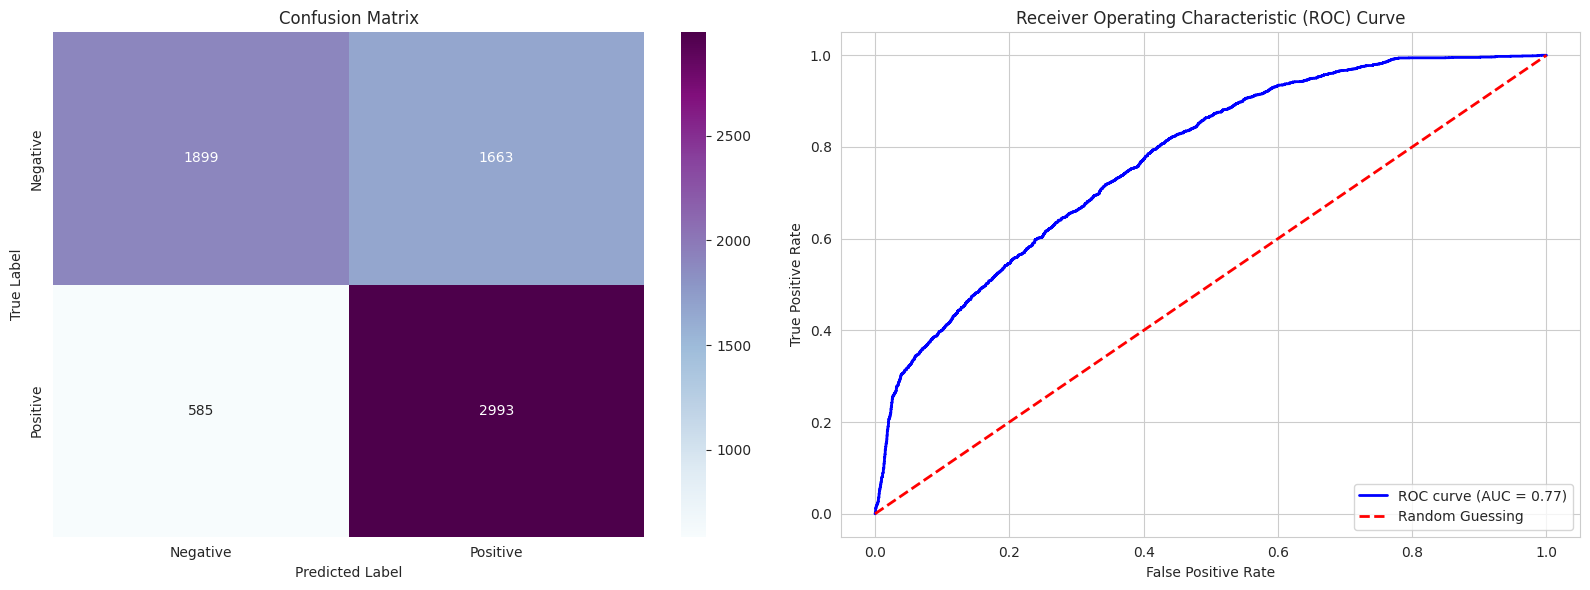

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve


# Assuming you have already split your data into training and testing sets (X_train, X_test, y_train, y_test)
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 1: Fit the logistic regression model
model = LogisticRegression(max_iter=1000,random_state=42)
model.fit(X_train, y_train)

# Step 2: Predict probabilities on the test data
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

# Step 5: Evaluate the model using other classification metrics (if needed)
# Predict on the test data
y_pred = model.predict(X_test)

# Step 4: Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy_lr)

# Other evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Create heatmap with a different palette
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='BuPu', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=axes[0])
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')
axes[0].set_title('Confusion Matrix')

# ROC Curve and AUC Score
fpr_lr, tpr_lr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score_lr = roc_auc_score(y_test, y_pred_proba)

# Visualize the ROC curve
axes[1].plot(fpr_lr, tpr_lr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_score_lr))
axes[1].plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Guessing')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.show()


#### **Random Forest Classifier**

Test Accuracy: 0.8631652661064426
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.81      0.86      3562
         1.0       0.83      0.91      0.87      3578

    accuracy                           0.86      7140
   macro avg       0.87      0.86      0.86      7140
weighted avg       0.87      0.86      0.86      7140

Confusion Matrix:
[[2900  662]
 [ 315 3263]]


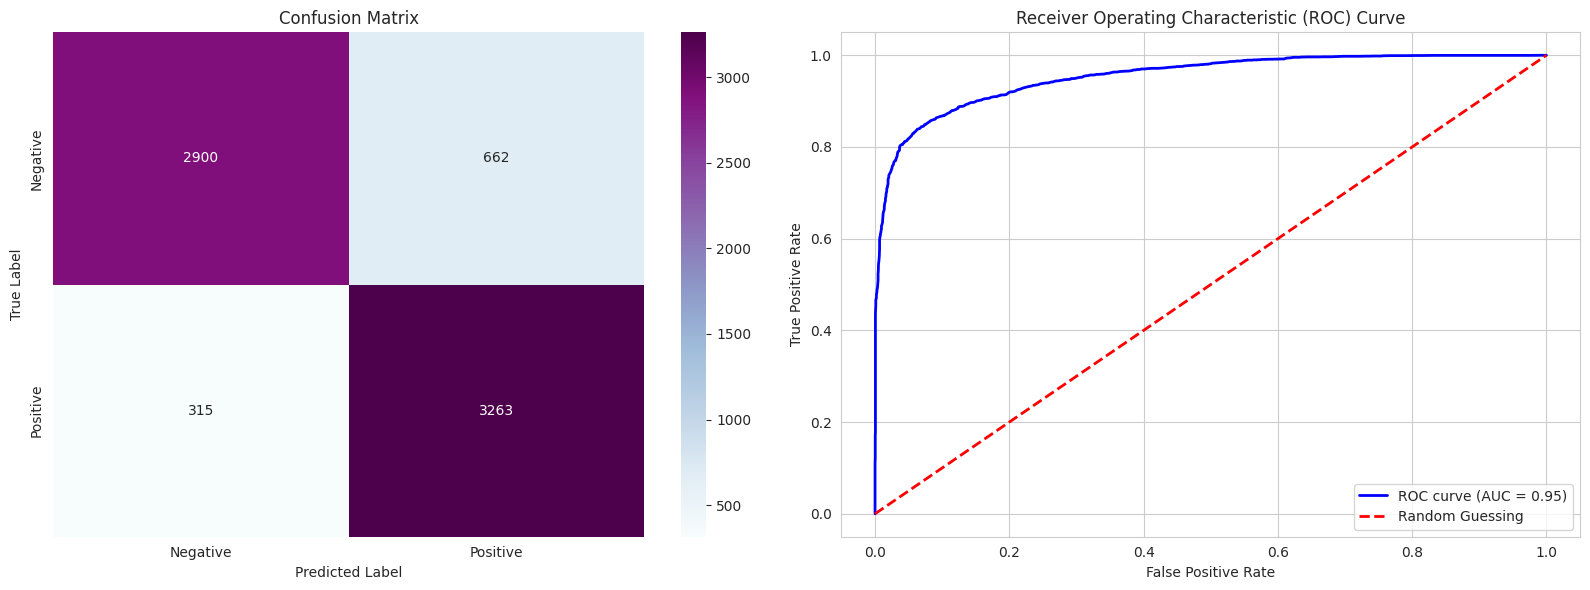

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming you have already split your data into training and testing sets (X_train, X_test, y_train, y_test)

# Step 1: Create the RandomForestClassifier model
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)  # You can adjust the hyperparameters as needed

# Step 2: Train the model on the training data
rf_model.fit(X_train, y_train)

# Step 3: Make predictions on the test data
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

# Step 4: Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy_rf)

# Other evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# ROC Curve and AUC Score
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_pred_proba)
auc_score_rf = roc_auc_score(y_test, y_pred_proba)


# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Create heatmap with a different palette
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='BuPu', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=axes[0])
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')
axes[0].set_title('Confusion Matrix')


# Visualize the ROC curve
axes[1].plot(fpr_rf, tpr_rf, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_score_rf))
axes[1].plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Guessing')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.show()


#### **Support Vector Classifier**

Test Accuracy: 0.49873949579831933
Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.97      0.66      3562
         1.0       0.50      0.03      0.05      3578

    accuracy                           0.50      7140
   macro avg       0.50      0.50      0.35      7140
weighted avg       0.50      0.50      0.35      7140



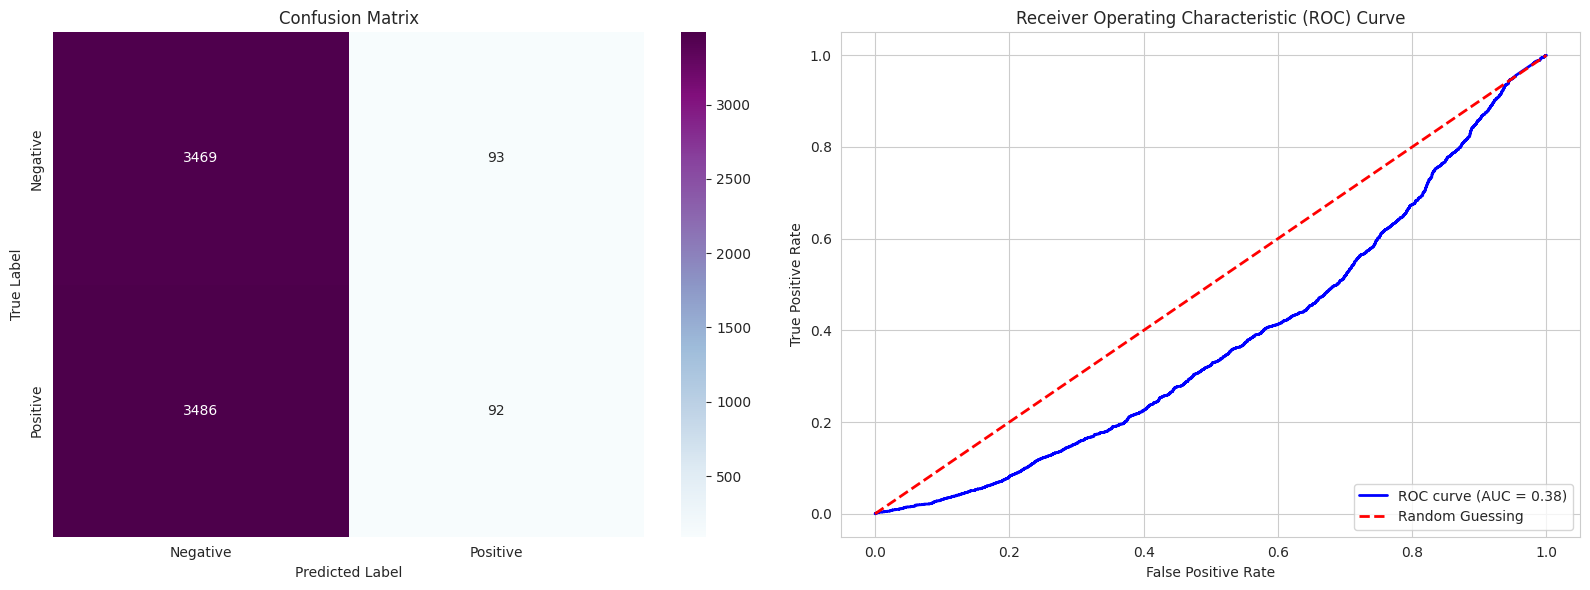

In [114]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming you have already split your data into training and testing sets (X_train, X_test, y_train, y_test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 1: Create the SVC model
svm_model = SVC(kernel='rbf', probability=True, random_state=42)  # You can adjust the kernel and other hyperparameters as needed

# Step 2: Train the model on the training data
svm_model.fit(X_train, y_train)

# Step 3: Make predictions on the test data
y_pred = svm_model.predict(X_test)
y_pred_proba = svm_model.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

# Step 4: Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy_svm)

# Other evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:")
# print(conf_matrix)

# ROC Curve and AUC Score
fpr_svm, tpr_svm, thresholds = roc_curve(y_test, y_pred_proba)
auc_score_svm = roc_auc_score(y_test, y_pred_proba)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Create heatmap with a different palette
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='BuPu', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=axes[0])
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')
axes[0].set_title('Confusion Matrix')

# Visualize the ROC curve
axes[1].plot(fpr_svm, tpr_svm, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_score_svm))
axes[1].plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Guessing')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.show()


It can be seen that the Support Vector Machine is underperforming from the ROC AUC curve which might be due to the reason of non linearity in the data . As from the confusion matrix it can be identified that the Negative class is overpowering the positive class samples making it difficult for the models to learn.

#### **Fine Tuning**

##### **Feature Selection using forward subset selection**

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming 'X' contains the features and 'y' contains the target variable (class labels)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize an empty set to store selected features
selected_features = set()

# Initialize a list to store the performance of models with different feature subsets
performance_history = []

# Define the maximum number of features to select
max_features = X_train.shape[1]

# Loop through each feature
for i in range(max_features):
    # Initialize a list to store the performance of models with current feature added
    feature_performance = []

    # Iterate through remaining features
    for feature in set(X_train.columns) - selected_features:
        # Create a new feature set by adding the current feature
        new_features = list(selected_features) + [feature]

        # Train a model using only the selected features
        model = RandomForestClassifier(random_state=42)
        model.fit(X_train[new_features], y_train)

        # Evaluate the model on the test set
        y_pred = model.predict(X_test[new_features])
        accuracy = accuracy_score(y_test, y_pred)

        # Store the performance and feature subset
        feature_performance.append((accuracy, feature))

    # Select the best performing feature and add it to the selected features set
    best_feature = max(feature_performance, key=lambda x: x[0])
    selected_features.add(best_feature[1])
    performance_history.append((i+1, best_feature[0], selected_features.copy()))

# Print the selected features and their performance history
for idx, accuracy, features in performance_history:
    print(f"Features selected after {idx} iterations: {features}, Accuracy: {accuracy}")


Features selected after 1 iterations: {'TOTAL_CLOSING_AMOUNT'}, Accuracy: 0.726750700280112
Features selected after 2 iterations: {'TOTAL_CLOSING_AMOUNT', 'Total CG Amount'}, Accuracy: 0.7750700280112045
Features selected after 3 iterations: {'TOTAL_CLOSING_AMOUNT', 'Total CG Amount', 'Closing Damage Assessment'}, Accuracy: 0.7978991596638656
Features selected after 4 iterations: {'Current Total DOB Amount (no Legal Fees removed)', 'TOTAL_CLOSING_AMOUNT', 'Total CG Amount', 'Closing Damage Assessment'}, Accuracy: 0.8173669467787115
Features selected after 5 iterations: {'Current Total DOB Amount (no Legal Fees removed)', 'Total CG Amount', 'Closing Damage Assessment', 'TOTAL_CLOSING_AMOUNT', 'Closing Total DOB Amount'}, Accuracy: 0.8407563025210084
Features selected after 6 iterations: {'Current Total DOB Amount (no Legal Fees removed)', 'Total CG Amount', 'TOTAL_CLOSING_AMOUNT', 'Closing Damage Assessment', 'Total ACG Amunt', 'Closing Total DOB Amount'}, Accuracy: 0.8467787114845938
F

After Performing the forward selection technique following feature columns were considered to deliver the best results with the highest accuracy relatively compared to other iterations:


Features selected after **17 iterations**:

* 'Structure Type_Mobile Home on Leased Land',
* 'Closing Total DOB Amount',
* 'Damage Type 1 or 2_2.0',
* 'Structure Type_Single (including mobile home)',
* 'Applicant With Current Insurance (Private and/or Flood) Y/N',
* 'Current Damage Assessment',
* 'Current Total DOB Amount (no Legal Fees removed)',
* 'Current PSV',
* 'Closing Option_2.0',
* 'Structure Type_Townhouse',
* 'Total ACG Amunt',
* 'Closed with Approved Unmet Needs (Y/N)',
* 'Current Legal Fees',
* 'GIS City',
* 'TOTAL_CLOSING_AMOUNT',
* 'Difference between Current PSV and Current Damage Assessment Type 2 (col AG - col AC', 'Total CG Amount'

**Accuracy:** 0.873249299719888


In [52]:
selected_features = ['Structure Type_Mobile Home on Leased Land','Closing Total DOB Amount','Damage Type 1 or 2_2.0','Structure Type_Single (including mobile home)','Applicant With Current Insurance (Private and/or Flood) Y/N','Current Damage Assessment','Current Total DOB Amount (no Legal Fees removed)','Current PSV','Closing Option_2.0','Structure Type_Townhouse','Total ACG Amunt','Closed with Approved Unmet Needs (Y/N)', 'Current Legal Fees','GIS City','TOTAL_CLOSING_AMOUNT','Difference between Current PSV and Current Damage Assessment Type 2 (col AG - col AC','Total CG Amount']

feature_selected_X = X_resampled[selected_features]

Test Accuracy: 0.8658263305322129
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86      3562
         1.0       0.86      0.88      0.87      3578

    accuracy                           0.87      7140
   macro avg       0.87      0.87      0.87      7140
weighted avg       0.87      0.87      0.87      7140



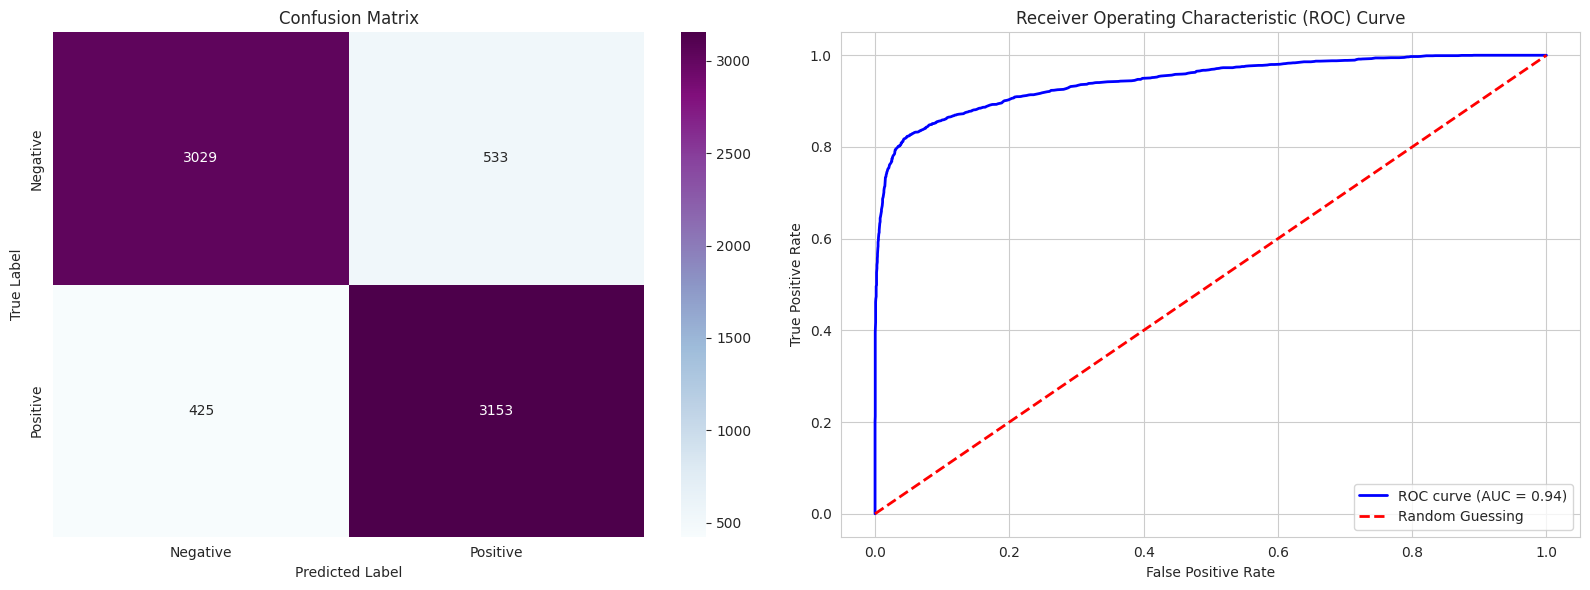

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming you have already split your data into training and testing sets (X_train, X_test, y_train, y_test)
X_train, X_test, y_train, y_test = train_test_split(feature_selected_X, y_resampled, test_size=0.2, random_state=42)


# Step 1: Create the RandomForestClassifier model
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)  # You can adjust the hyperparameters as needed

# Step 2: Train the model on the training data
rf_model.fit(X_train, y_train)

# Step 3: Make predictions on the test data
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Other evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix_fs = confusion_matrix(y_test, y_pred)

# ROC Curve and AUC Score
fpr_fs, tpr_fs, thresholds = roc_curve(y_test, y_pred_proba)
auc_score_fs = roc_auc_score(y_test, y_pred_proba)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Create heatmap with a different palette
sns.heatmap(conf_matrix_fs, annot=True, fmt='d', cmap='BuPu', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=axes[0])
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')
axes[0].set_title('Confusion Matrix')

# Visualize the ROC curve
axes[1].plot(fpr_fs, tpr_fs, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_score_fs))
axes[1].plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Guessing')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.show()


##### **Applied Bagging**

/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


Test Accuracy: 0.8728291316526611
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87      3562
         1.0       0.85      0.90      0.88      3578

    accuracy                           0.87      7140
   macro avg       0.87      0.87      0.87      7140
weighted avg       0.87      0.87      0.87      7140



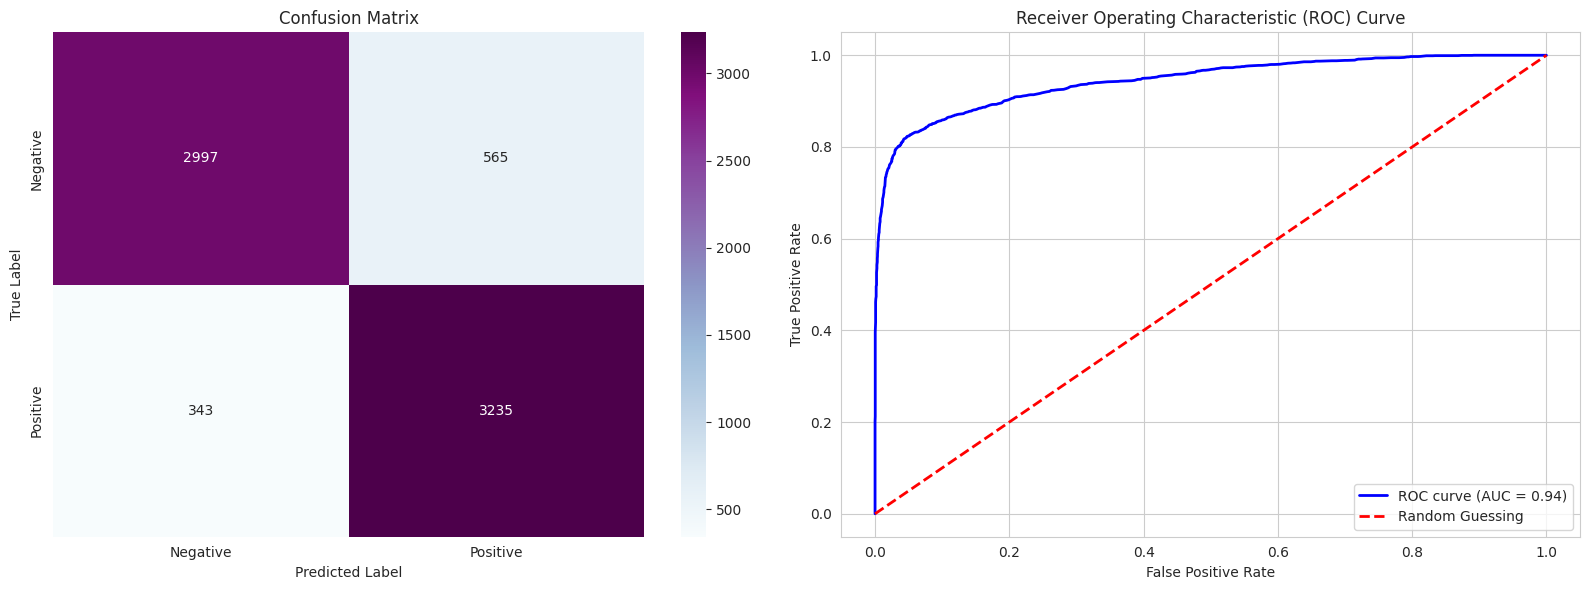

In [56]:
from sklearn.ensemble import BaggingClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score



# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define the base classifier
base_classifier = DecisionTreeClassifier()

# Define the BalancedBaggingClassifier
bagging_classifier = BalancedBaggingClassifier(base_estimator=base_classifier,
                                               n_estimators=50,  # Number of base estimators (decision trees)
                                               sampling_strategy='auto',  # Automatically adjust class weights
                                               random_state=42)

# Fit the classifier to the training data
bagging_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = bagging_classifier.predict(X_test)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Other evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix_bagging = confusion_matrix(y_test, y_pred)

# ROC Curve and AUC Score
fpr_bagging, tpr_bagging, thresholds = roc_curve(y_test, y_pred_proba)
auc_score_bagging = roc_auc_score(y_test, y_pred_proba)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Create heatmap with a different palette
sns.heatmap(conf_matrix_bagging, annot=True, fmt='d', cmap='BuPu', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=axes[0])
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')
axes[0].set_title('Confusion Matrix')

# Visualize the ROC curve
axes[1].plot(fpr_bagging, tpr_bagging, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_score_bagging))
axes[1].plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Guessing')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.show()


### **MODEL COMPARISON**

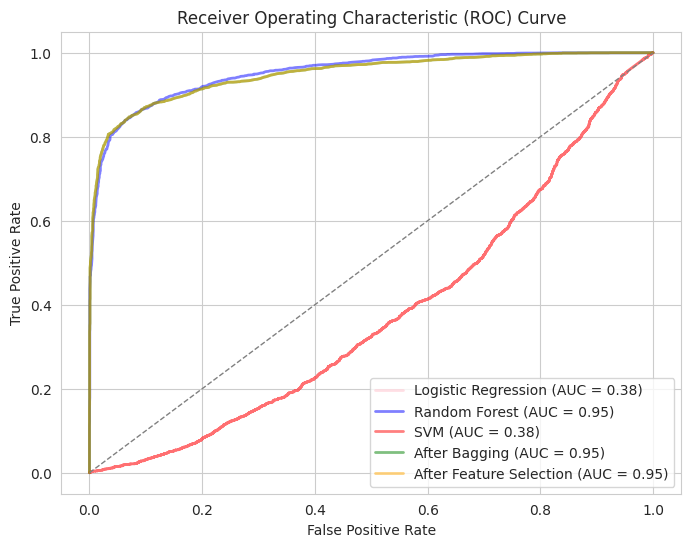

In [113]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='pink', alpha=0.5, lw=2, label=f'Logistic Regression (AUC = {auc_score_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, color='blue', alpha=0.5, lw=2, label=f'Random Forest (AUC = {auc_score_rf:.2f})')
plt.plot(fpr_svm, tpr_svm, color='red', alpha=0.5, lw=2, label=f'SVM (AUC = {auc_score_svm:.2f})')
plt.plot(fpr_bagging, tpr_bagging, color='green',alpha=0.5, lw=2, label='After Bagging (AUC = {:.2f})'.format(auc_score_bagging))
plt.plot(fpr_fs, tpr_fs, color='orange', alpha=0.5, lw=2, label='After Feature Selection (AUC = {:.2f})'.format(auc_score_fs))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Here it can be seen all the models except the Support Vector Machine performed well where Random fores performed the best which could be due to the factor of ability to compare multiple decision trees and considering the best performer of all.

Further by applying bagging , its ability to find out the best subset of data might have appreciated the testing accuracy much further leading to a further improvement in the model classification.


<center>

| Model Name | |Precision | Recall | F1-Score | Test Accuracy |
| --- | --- | --- | --- | --- | --- |
| **Logistic Regression** | 0 | 0.76 | 0.53 | 0.63 |68.51%|
|  | 1 | 0.64 | 0.84 | 0.73 |
| **Random Forest** | 0 | 0.90 | 0.91 | 0.87 | 86.31% |
|  | 1 | 0.83 | 0.91 | 0.87 |
| **Support Vector Machines** | 0 | 0.50 | 0.97 | 0.66 | 49.92% |
|  | 1 | 0.50 | 0.03 | 0.05 |
| **Forward Subset Selection** | 0 | 0.88 | 0.85 | 0.86 | 86.58% |
|  | 1 | 0.86 | 0.88 | 0.87 |
| **Bagging** | 0 | 0.90 | 0.84 | 0.87 | 87.28% |
|  | 1 | 0.85 | 0.90 | 0.88 |

</center>


After analysing the above model the final model to be considered here is Random Forest Classifier along with Bagging technique which helped to select the most optimal set of data for classification.